# Lesson 1.9: Improving the model

### Lesson Duration: 3 hours

> Purpose: The purpose of this DIY (Do It Yourself) lesson is to go through the complete process of building the model and using different techniques to improve the accuracy of the model. As George Box famously said, "All models are wrong but some are useful".

### Learning Objectives

After this lesson, students will be able to:

- Apply a linear regression model from the beginning
- Improve the accuracy of the model
- Collaborate using Git and GitHub
- Deliver impactful presentations

---

### Lesson 1 key concepts

> :clock10: 20 mins

- Revisiting the model
- List down the followed steps
- Spot the areas in the model where changes could be made
- Apply the changes
- Fit the model and check the accuracy
- Compare the changes in the different models


# ~~Lab | Customer Analysis Round 7~~

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab_round7` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.

### Lesson 2 key concepts

> :clock10: 20 min

- Quick recap to version control systems: Why git and Github?
- Managing a repository on GitHub (quick recap - already discussed on day 1):
  - Create a repo
  - Make changes and commit to a repo
  - Forking and cloning a repo
  - Fork vs. clone
  - Create a pull request

</details>

### Lesson 3 key concepts

> :clock10: 20 min

- Working with branches
- Resolving merge conflicts
- Adding large files on GitHub
- Initializing directories on personal computer as GitHub repos



```shell
$ git branch 	                        # shows the current branches in the repo
$ git branch -a 	                    # shows all branches (even the ones you haven't worked on)
$ git checkout -b <NameOfNewBranch>	  # creates new branch
$ git checkout <BranchName> 	        # switches to the branch we want to work on
$ git pull 	                          # pulls the latest changes to the branch we are working on (git pull = git fetch + git merge)
$ git fetch 	                        # gets all branches from the repository
```

#### Merging Branches

Case 1: Merges changes in branch to the master file

```shell
$ git checkout master
$ git merge <Name of Branch to be merged to Master>
```

Case 2: Merges changes in master file to the branch

```shell
$ git checkout <branch name>
$ git merge master
```

### :pencil2: Practice on key concepts - Lab

> :clock10: 30 min

Encoding Categorical Data.# Lab | Customer Analysis Final Round

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab_final` folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

- Data Description.
- Goal.

### 02 - Getting Data

- Read the `.csv` file.

### 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

### 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

### 05 - Modeling

- Apply model.

### 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

### 07 - Reporting

- Present results.

# Solution to Lab: Custumer Analysis Final Round

<font color='magenta'>
Please comment before each cell of code using a markdown cell. You should clearly state with your own words what the portion of code in the cell bellow does or add other insightful comments on that operation. Use the html tags in this cell to add your comments in a striking color for an easy review.
</font>


### 01 - Problem (case study)

Data Description.

- **customer:** Customer ID
- **state:** US State
- **customer_lifetime_value:** CLV is the client economic value for a company during all their relationship
- **response:** Response to marketing calls (customer engagement)
- **coverage:** Customer coverage type
- **education:** Customer education level
- **effective_to_date:** Effective to date
- **employmentstatus:** Customer employment status
- **gender:** Customer gender
- **income:** Customer income
- **location_code:** Customer living zone
- **marital_status:** Customer marital status
- **monthly_premium_auto:** Monthly premium
- **months_since_last_claim:** Last customer claim
- **months_since_policy_inception:** Policy Inception
- **number_of_open_complaints:** Open claims
- **number_of_policies:** Number policies
- **policy_type:** Policy type
- **policy:** Policy
- **renew_offer_type:** Renew
- **sales_channel:** Sales channel (customer-company first contact)
- **total_claim_amount:** Claims amount
- **vehicle_class:** Vehicle class
- **vehicle_size:** Vehicle size
- **vehicle_type:** Vehicle type

**Goal.**  
Can we predict the amount claimed by a client?

### 02 - Getting Data

- Read `.csv` file

In [166]:
import pandas as pd                                           # panel data, handling dataframes
pd.set_option('display.max_columns', None)

In [137]:
data=pd.read_csv('./files_for_lab_final/csv_files/marketing_customer_analysis.csv')    # import csv file
data.head()                                                    # show first 5 rows

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 03 - Cleaning/Wrangling/EDA

- Change headers names.

In [138]:
data.shape       # dataframe dimensions

(9134, 24)

In [139]:
data.columns     # columns headers

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [140]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]   # lower and replace
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

- Deal with NaN values.

In [141]:
data.info(memory_usage='deep')   # dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [142]:
data.isna().sum()     # missing values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [143]:
data = data.drop(columns=['vehicle_class', 'customer', 'marital_status', 'sales_channel', 'policy', 'vehicle_size'])   # drop useless columns (no info or nan)

In [144]:
data=data.dropna()   # drop rows with nan values

In [145]:
for c in data.columns.tolist():         # know the unique values for each column
    print(c, len(data[c].unique()))

state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
renew_offer_type 4
total_claim_amount 5106


In [146]:
data.shape

(9134, 18)

In [147]:
data['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

- Datetime Features.

**Effective To Date**

In [148]:
print(f"Original dtype: {data['effective_to_date'].dtype}\n")   # object
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])   # datetime
print(f"Meantime dtype: {data['effective_to_date'].dtype}")

Original dtype: object

Meantime dtype: datetime64[ns]


In [149]:
print('--')
print(f"Min date: {data['effective_to_date'].min()}")         # from January 1st..
print(f"Max date: {data['effective_to_date'].max()}")         # to February 28th
print('--')

--
Min date: 2011-01-01 00:00:00
Max date: 2011-02-28 00:00:00
--


In [150]:
data['effective_to_date']=data['effective_to_date'].apply(lambda x: x.toordinal())   # you can change the type to ordinal.

print(f"New dtype: {data['effective_to_date'].dtype}")

New dtype: int64


In [151]:
# Or alternatively use Unix time
# data['effective_to_date']  = (data['effective_to_date']  - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

- Categorical Features.

**Values for each class in categorical features**

In [152]:
cat_cols=[col for col in data.columns if (data[col].dtype==object)]     # categorical columns

In [153]:
print('Categorical Features:', len(cat_cols))
print('----------')
for c in cat_cols:
    print(f'Name: {data[c].name}')    # column name
    print(f'Type: {data[c].dtype}')   # column type
    print(f'Unique values: {len(data[c].unique())}')   # column unique values
    print(data[c].unique())
    print(((data[c].value_counts()/ sum(data[c].value_counts()))*100))   # percentage
    print('\n----------')

Categorical Features: 9
----------
Name: state
Type: object
Unique values: 5
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: state, dtype: float64

----------
Name: response
Type: object
Unique values: 2
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: response, dtype: float64

----------
Name: coverage
Type: object
Unique values: 3
['Basic' 'Extended' 'Premium']
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: coverage, dtype: float64

----------
Name: education
Type: object
Unique values: 5
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: education, dtype: float64

----------
Name: employmentstatus
Type: object
Unique values: 5
['Employed

- Numerical Features.

In [154]:
data.describe()     # stats

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,734166.837749,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,16.942769,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,734138.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,734152.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,734166.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,734181.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,734196.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [155]:
num_cols=[c for c in data.columns if (data[c].dtype!='object') and (c!='Effective To Date')]   # numerical columns
# != quiere decir que no es igual

- Exploration.

**Bar plot for each categorical variable.**

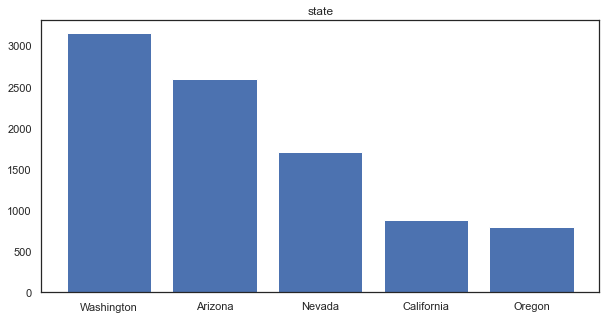

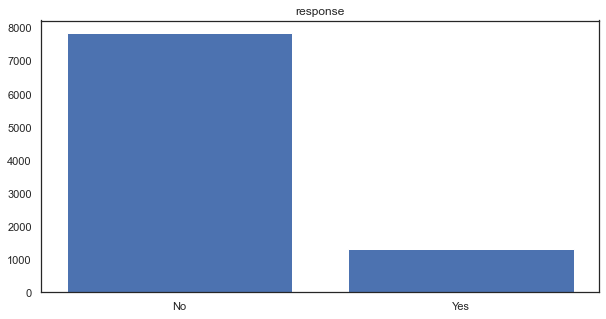

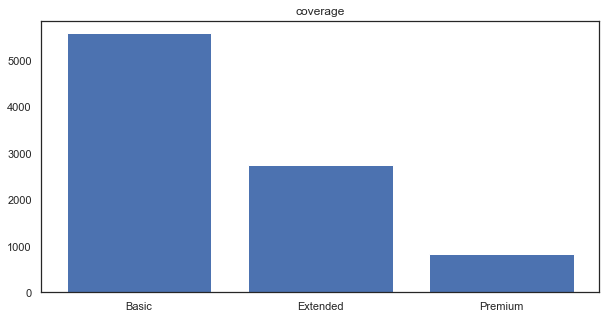

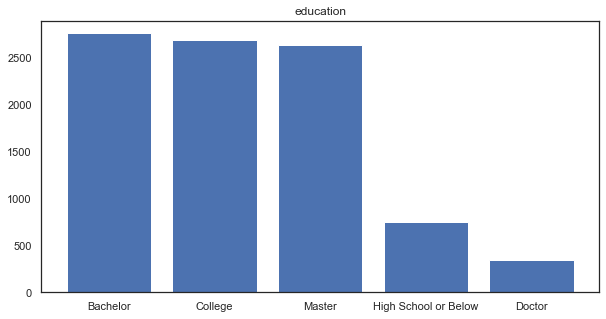

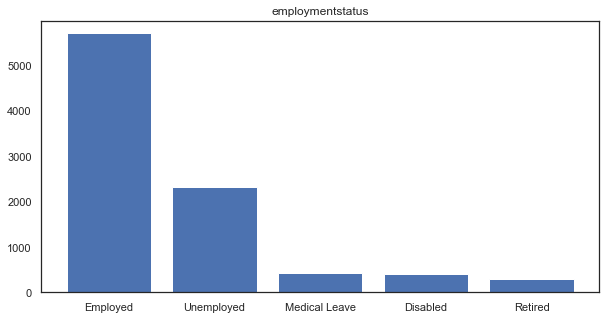

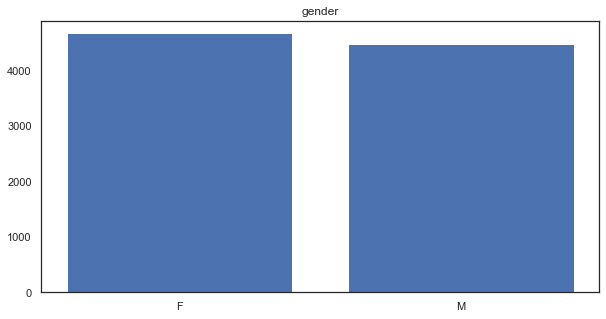

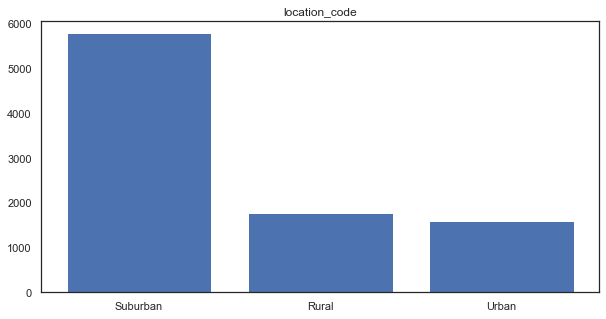

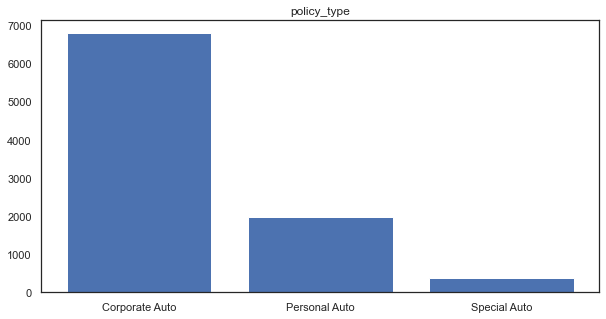

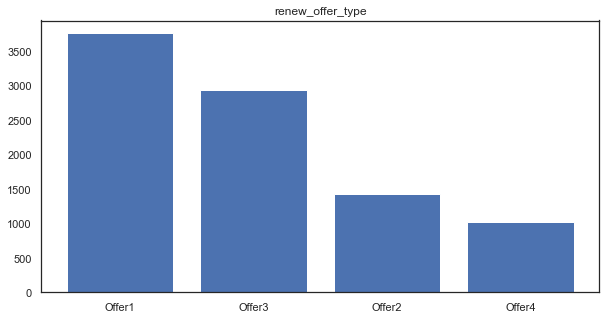

In [156]:
import matplotlib.pyplot as plt                 # visualization library
%matplotlib inline

for c in cat_cols:
    plt.figure(figsize=(10,5))
    plt.bar(data[c].unique(), data[c].value_counts())
    plt.title(c)
    plt.show();

In [157]:
import seaborn as sns                           # visualization library, extends plt
sns.set(style="white")                          # style

**Correlation**

C:\Users\SR133EX\AppData\Local\Temp\ipykernel_7848\129339137.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle


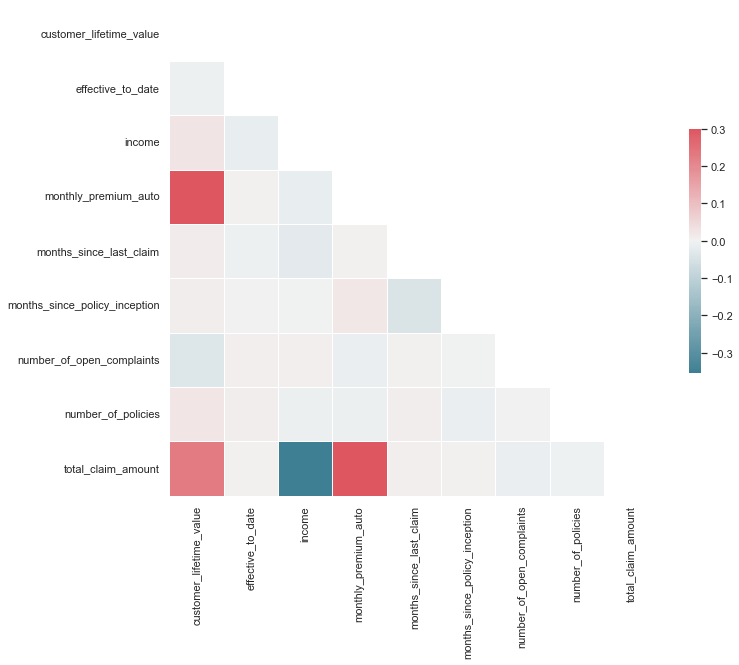

In [158]:
import numpy as np    # numerical python, algebra library


corr=data.corr()      # compute the correlation matrix


mask=np.triu(np.ones_like(corr, dtype=np.bool))     # generate a mask for the upper triangle

f, ax=plt.subplots(figsize=(11, 9))                 # set up the matplotlib figure

cmap=sns.diverging_palette(220, 10, as_cmap=True)   # generate a custom diverging colormap

sns.heatmap(corr, mask=mask, cmap=cmap,             # draw the heatmap with the mask and correct aspect ratio
            vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5});

**All variables**
(be careful, this command may be quite memory hungry)

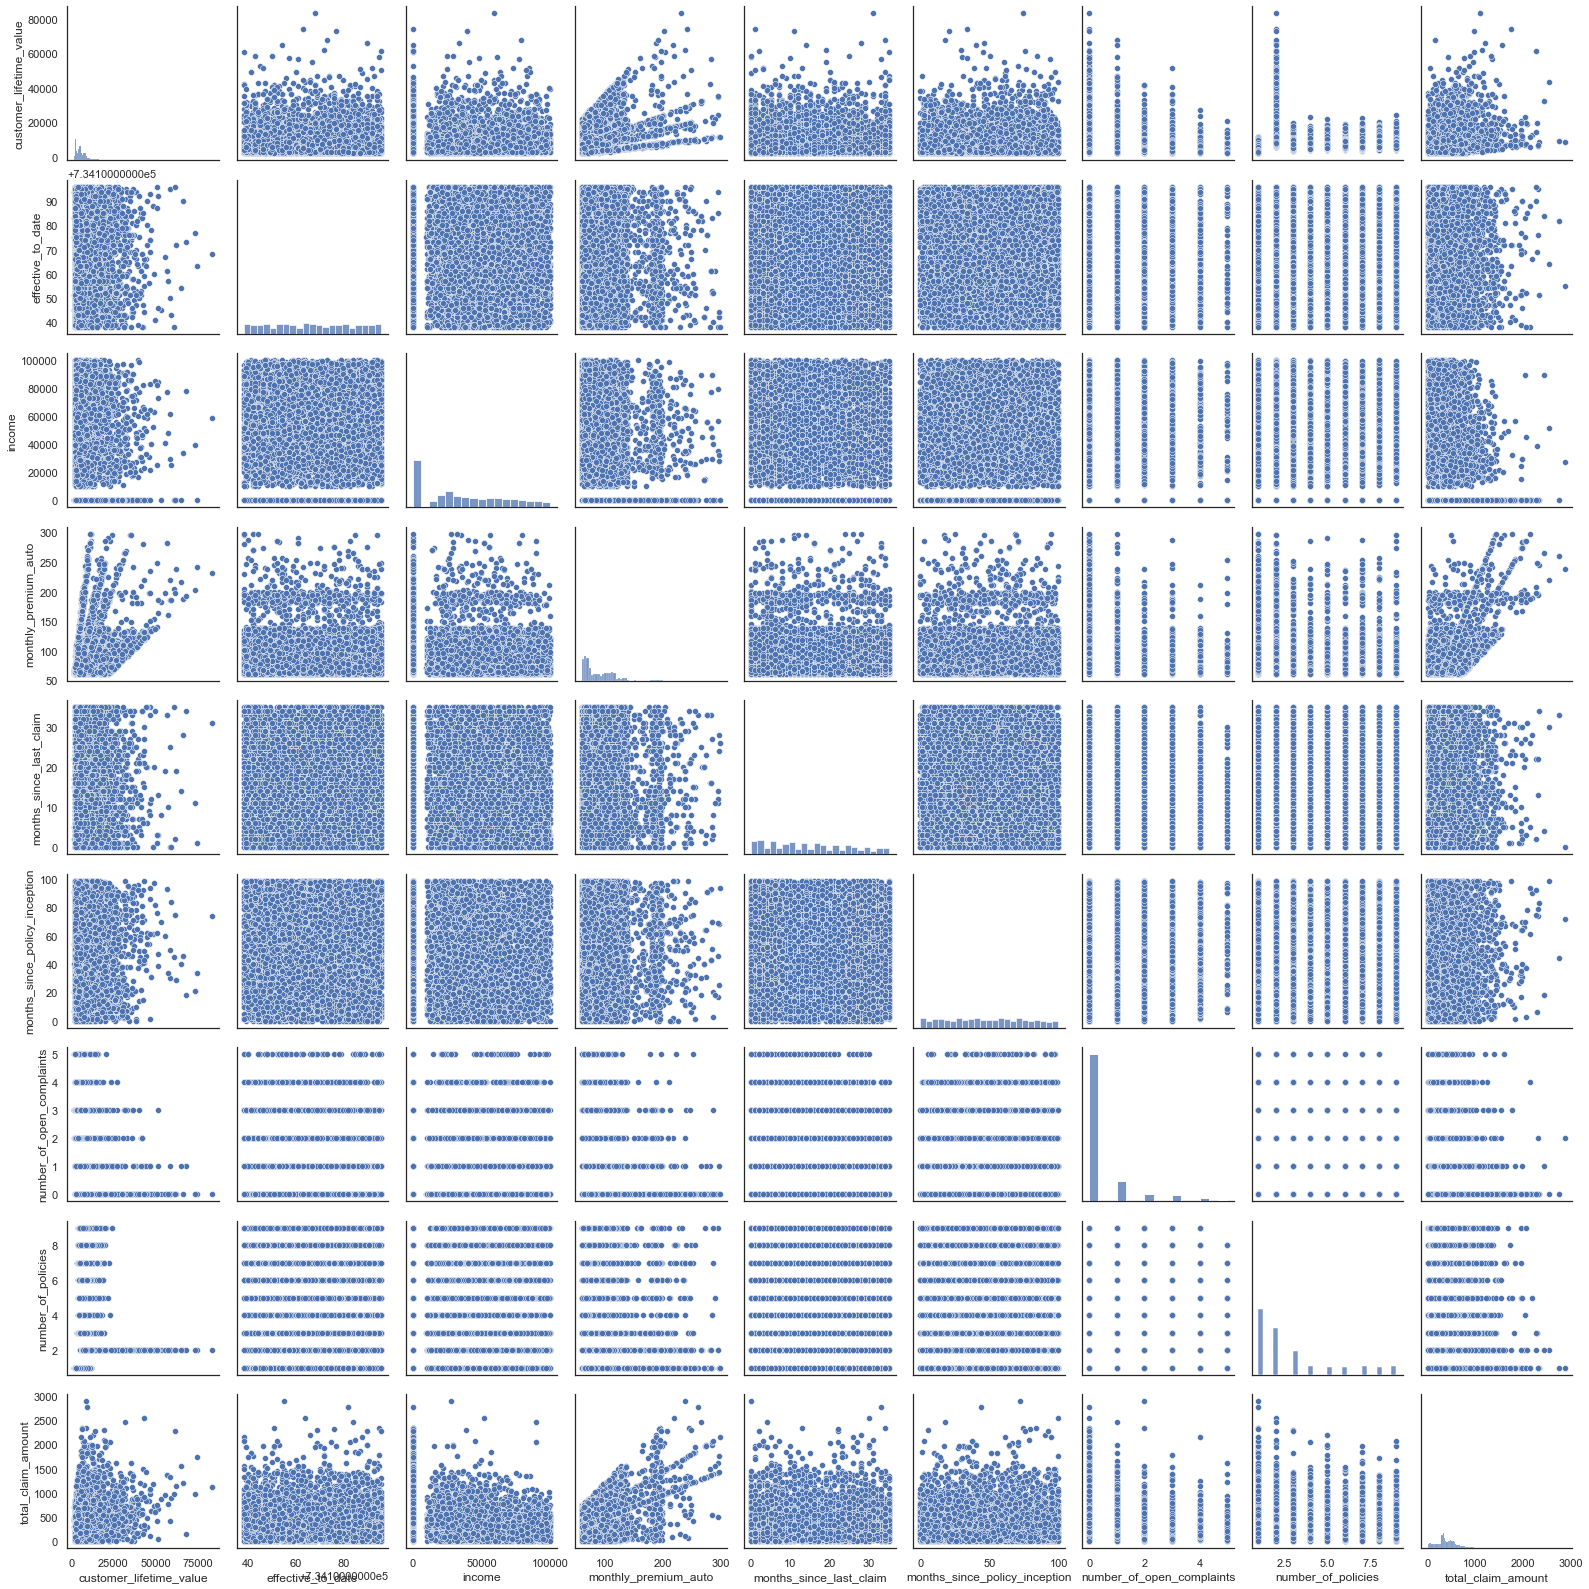

In [159]:
sns.pairplot(data[num_cols]);

**Bar plot for each numerical variable.**

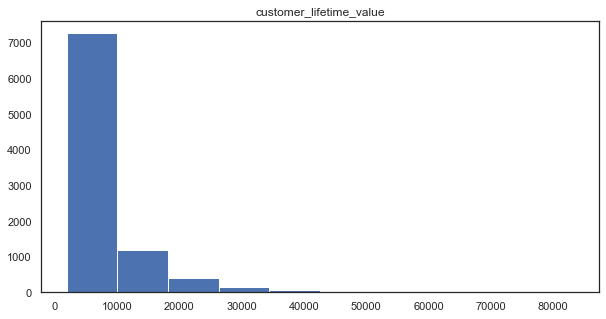

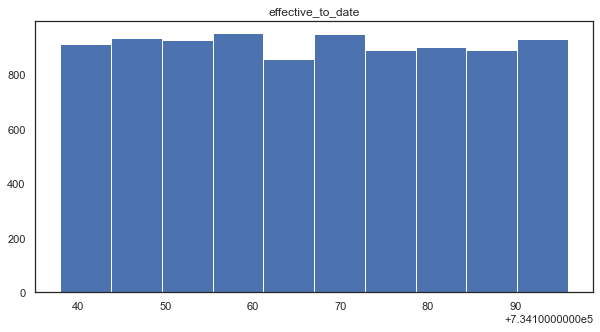

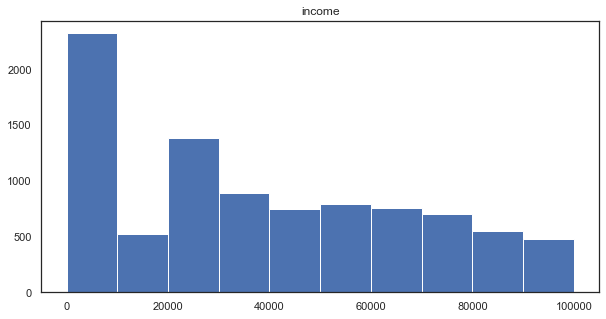

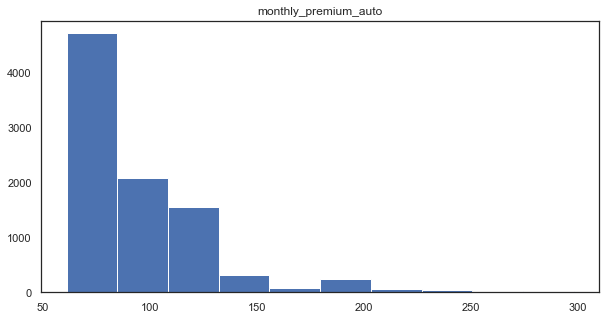

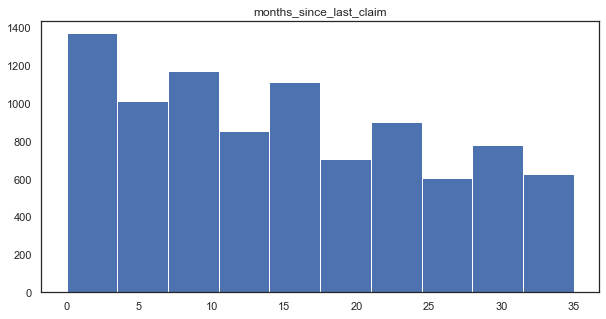

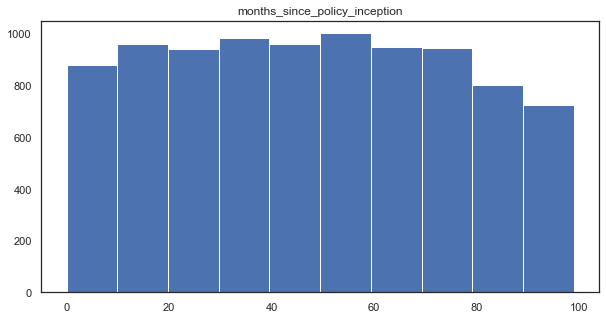

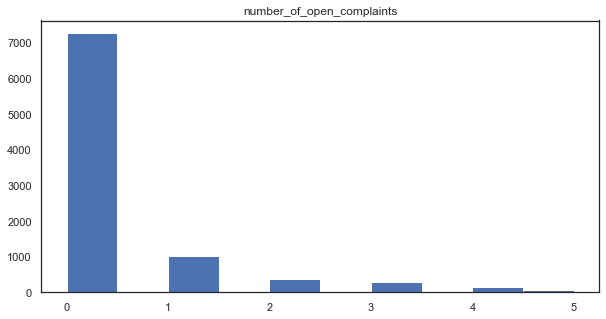

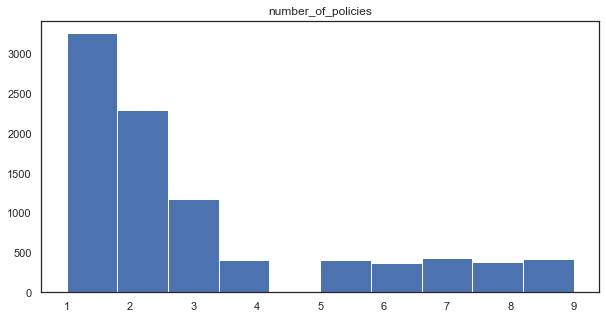

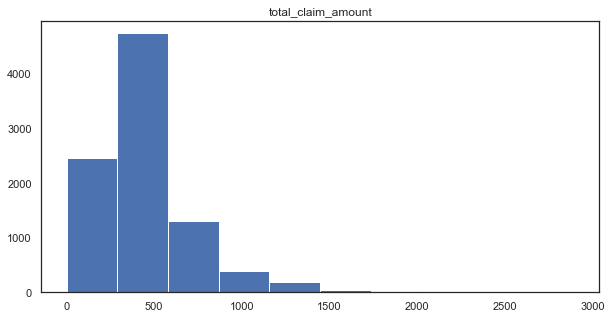

In [160]:
for c in num_cols:
    plt.figure(figsize=(10,5))
    plt.hist(data[c])
    plt.title(c)
    plt.show();

**Box plot for each numerical variable for know outliers of each feature.**

C:\Users\SR133EX\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


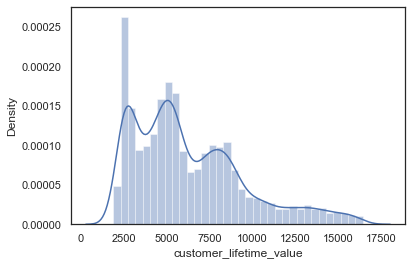

In [161]:
iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr
data = data[(data['customer_lifetime_value'] > lower_limit) & (data['customer_lifetime_value'] < upper_limit)]
sns.distplot(data['customer_lifetime_value'])
plt.show()

C:\Users\SR133EX\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


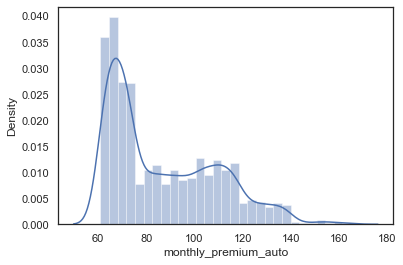

In [162]:
iqr = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25)
upper_limit = np.percentile(data['monthly_premium_auto'],75) + 1.5*iqr
lower_limit = np.percentile(data['monthly_premium_auto'],25) - 1.5*iqr
data = data[(data['monthly_premium_auto'] > lower_limit) & (data['monthly_premium_auto'] < upper_limit)]
sns.distplot(data['monthly_premium_auto'])
plt.show()

C:\Users\SR133EX\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SR133EX\Anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\SR133EX\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\SR133EX\Anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


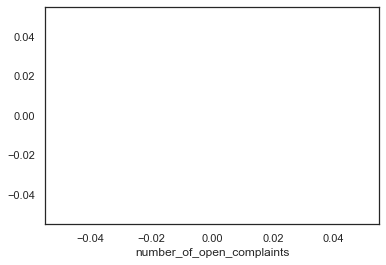

In [163]:
iqr = np.percentile(data['number_of_open_complaints'],75) - np.percentile(data['number_of_open_complaints'],25)
upper_limit = np.percentile(data['number_of_open_complaints'],75) + 1.5*iqr
lower_limit = np.percentile(data['number_of_open_complaints'],25) - 1.5*iqr
data = data[(data['number_of_open_complaints'] > lower_limit) & (data['number_of_open_complaints'] < upper_limit)]
sns.distplot(data['number_of_open_complaints'])
plt.show()

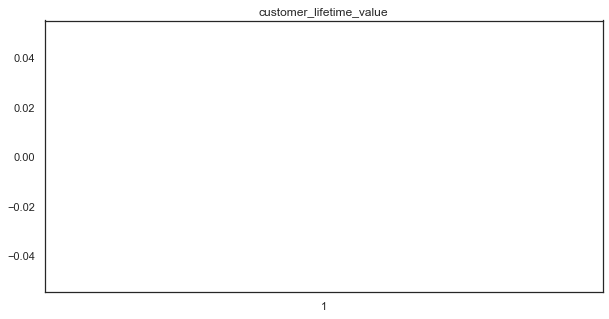

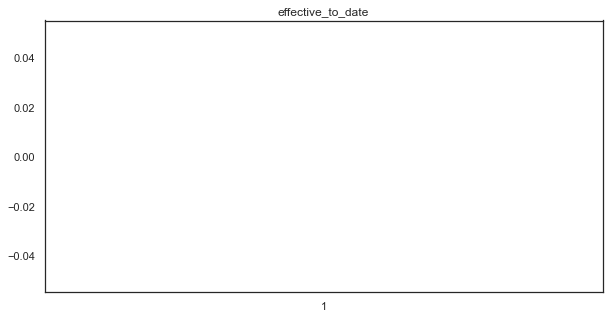

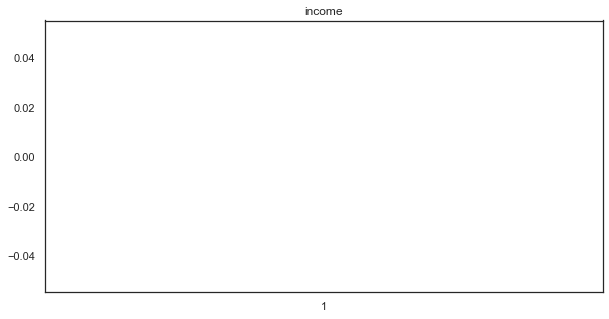

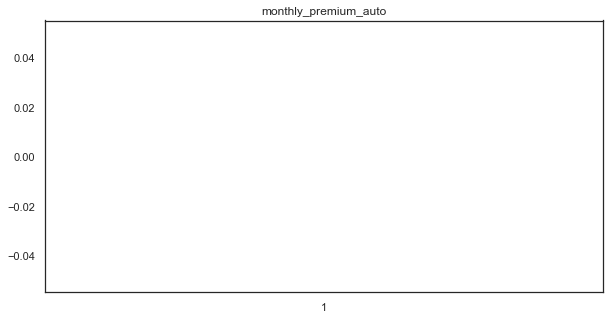

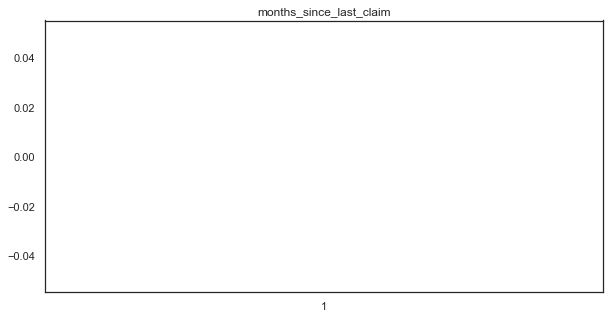

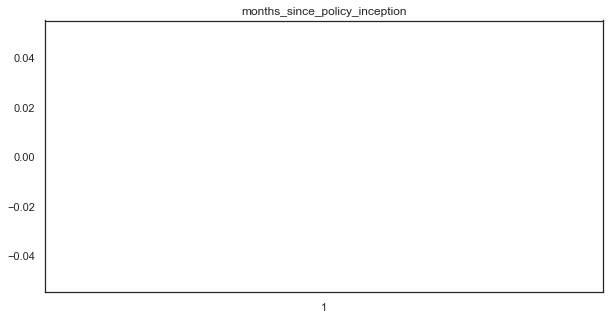

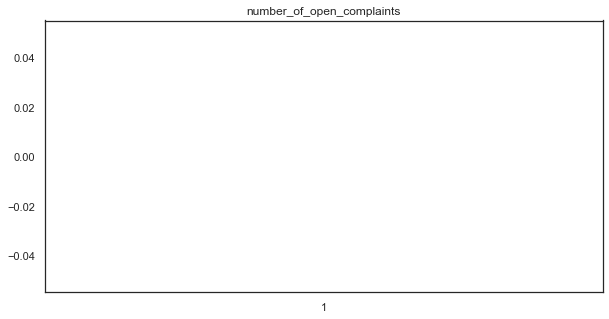

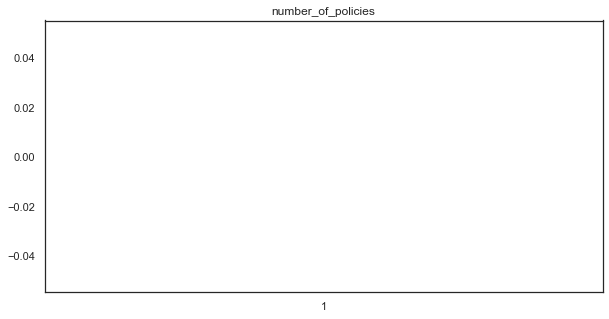

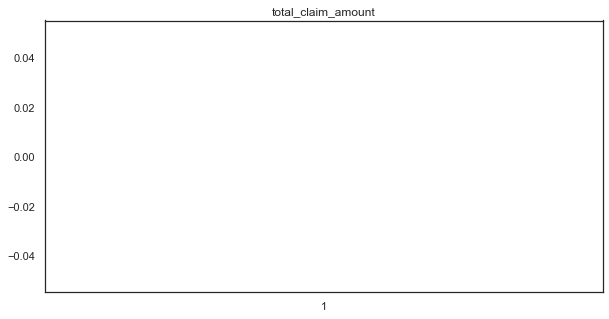

In [164]:
for c in num_cols:
    plt.figure(figsize=(10,5))
    plt.boxplot(data[c])
    plt.title(c)
    plt.show();

**Show a plot of the total number of response.**

**Show a plot of the response rate by sales channel.**

**Show a plot of the response rate by total claim amount.**

**Show a plot of the response rate by income.**

### 04 - Processing Data

- Dealing with outliers

In [ ]:
# e.g. 3*IQR in a column

q1=np.percentile(data['customer_lifetime_value'], 25)   # percentile 25
q3=np.percentile(data['customer_lifetime_value'], 75)   # percentile 75

iqr=q3-q1  # IQR

upper=q3+3*iqr   # upper boundary
lower=q1-3*iqr   # lower boundary

In [ ]:
len(data[data['customer_lifetime_value']<lower]) # no tenemos outliers en lower

In [ ]:
len(data[data['customer_lifetime_value']>upper])

- Normalization

**Min-Max Scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data['effective_to_date']=MinMaxScaler().fit_transform(data['effective_to_date'].values.reshape(-1, 1))

data['effective_to_date'].head()

**Standardize**

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols

In [ ]:
for c in num_cols[:-1]:   # we'll normalize all column except the last one (the target column)
    data[c]=StandardScaler().fit_transform(data[c].values.reshape(-1, 1))

In [ ]:
data.head()

- **Encoding Categorical Data**

In [ ]:
one_hot_data=pd.get_dummies(data[cat_cols], drop_first=True)   # one hot encoding categorical variables

one_hot_data.head()

**Concat numerical and categorical DataFrames**

In [ ]:
data=pd.concat([data, one_hot_data], axis=1)   # concat dataframes
data.drop(columns=cat_cols, inplace=True)
data.head()

- Splitting into train set and test set

In [ ]:
# first, split X-y (learning-target data)
X=data.drop(columns=['total_claim_amount'])
y=data['total_claim_amount']

# checking shape
print(X.shape)
print(y.shape)

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

In [ ]:
# train-test-split (4 sets)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)  # random state fixed sample

### 05 - Modeling

We have now the data prepared for the modeling phase.
https://s3.amazonaws.com/assets.datacamp.com/email/other/ML+Cheat+Sheet_2.pdf


Linear regression is a linear model, which means it works really nicely when the data has a linear shape. But, when the data has a non-linear shape, then a linear model cannot capture the non-linear features.

So in this case, you can use the tree-based methods, which do a better job at capturing the non-linearity in the data by dividing the space into smaller sub-spaces depending on the questions asked.

**Linear Regression**

In [169]:
from sklearn.linear_model import LinearRegression as LinReg
linreg=LinReg()    # model
linreg.fit(X_train, y_train)   # model train
y_pred_linreg=linreg.predict(X_test)   # model prediction

NameError: name 'X_train' is not defined

**Regularization**

In [ ]:
from sklearn.linear_model import Lasso       # L1
from sklearn.linear_model import Ridge       # L2
from sklearn.linear_model import ElasticNet  # L1+L2

In [ ]:
# Lasso L1

lasso=Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [ ]:
# Ridge L2

ridge=Ridge()
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [ ]:
# ElasticNet L1+L2

elastic=ElasticNet()
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

rfr=RFR()
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

**XGBoost**

In [ ]:
# conda install -c conda-forge xgboost

In [ ]:
from xgboost import XGBRegressor as XGBR

xgbr=XGBR()
xgbr.fit(X_train, y_train)

y_pred_xgbr = xgbr.predict(X_test)

**LightGBM**

In [ ]:
# conda install -c conda-forge lightgbm

In [ ]:
from lightgbm import LGBMRegressor as LGBMR

lgbmr=LGBMR()
lgbmr.fit(X_train, y_train)

y_pred_lgbmr = lgbmr.predict(X_test)

### 06 - Model Validation

In [ ]:
models=[linreg, lasso, ridge, elastic, rfr, xgbr, lgbmr]
model_names=['linreg', 'lasso', 'ridge', 'elastic', 'rfr', 'xgbr', 'lgbmr']
preds=[y_pred_linreg, y_pred_lasso, y_pred_ridge, y_pred_elastic, y_pred_rfr, y_pred_xgbr, y_pred_lgbmr]

- R2.

In [ ]:
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

- MSE.

In [170]:
from sklearn.metrics import mean_squared_error as mse

for i in range(len(models)):

    train_mse=mse(models[i].predict(X_train), y_train) #MSE
    test_mse=mse(preds[i], y_test)

    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

NameError: name 'models' is not defined

- **RMSE.**

In [ ]:
for i in range(len(models)):

    train_rmse=mse(models[i].predict(X_train), y_train)**0.5 #RMSE
    test_rmse=mse(preds[i], y_test)**0.5

    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

- MAE.

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train) #MAE
    test_mae=mae(preds[i], y_test)

    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

### Can you try to improve the model ?

I.e. you can try by removing columns that you feel are not predictive. Or making transformations to some columns to make them closer to a normal distribution, or..

    - Choosing a different way to fill null values
    - Working with a categorical variable to reduce the number of categories
    - Different data transformation
    - A different method to remove outliers
    - Choosing different scaling method

<font color='magenta'>
Your code goes here:
    
</font>

### 07 - Reporting

- Present results.

**Data Level**

- Drop Nan values because they are, in fact, duplicates.
- Do not drop outliers because they are just a few.

**Problem Level**

- Total claim amount has a great variance.
- We can predict the total claim amount with a 25% of error, even when R2 is high.
- We need to determinate which are the significative variables.

### Additional Resources

- [Best practices for PowerPoint presentations](https://alum.mit.edu/best-practices-powerpoint-presentations)
- [More tips on PowerPoint formatting](https://www.workfront.com/blog/10-tips-for-designing-presentations-that-dont-suck-part-1)